<a href="https://colab.research.google.com/github/mehraj-alom/Deep_learrning/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2025-07-11 18:13:01.956213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752257582.171102      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752257582.242081      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("Flower_images",origin=dataset_url,cache_dir=".",untar="True")

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
data_dir

'./datasets/Flower_images'

In [ ]:
import pathlib
data_dir = pathlib.Path("datasets/Flower_images/flower_photos")
data_dir

PosixPath('datasets/Flower_images/flower_photos')

In [ ]:
list(data_dir.glob("*/*.jp*g"))[:3]

[PosixPath('datasets/Flower_images/flower_photos/sunflowers/8202034834_ee0ee91e04_n.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/sunflowers/2979133707_84aab35b5d.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/sunflowers/9558632814_e78a780f4f.jpg')]

In [ ]:
image_paths_str = list(data_dir.glob("*/*.jp*g"))
print(len(image_paths_str),"\n",
image_paths_str[:3])

3670 
 [PosixPath('datasets/Flower_images/flower_photos/sunflowers/8202034834_ee0ee91e04_n.jpg'), PosixPath('datasets/Flower_images/flower_photos/sunflowers/2979133707_84aab35b5d.jpg'), PosixPath('datasets/Flower_images/flower_photos/sunflowers/9558632814_e78a780f4f.jpg')]


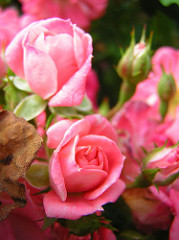

In [ ]:
roses = list(data_dir.glob("roses/*"))
PIL.Image.open(str(roses[1]))

In [ ]:
flower_image_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [ ]:
flower_target_list = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips":4
}

In [ ]:
flower_image_dict["roses"][0:5]

[PosixPath('datasets/Flower_images/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/roses/7820626638_3e2d712303.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/roses/2960709681_e95940c0f0_n.jpg'),
 PosixPath('datasets/Flower_images/flower_photos/roses/12434194695_a7c4e73c6b_n.jpg')]

In [ ]:
X=[]
y=[]

for flower_name , images in flower_image_dict.items():
     for image in images:
         img = cv2.imread(str(image))
         resized_img = cv2.resize(img,(180,180))
         X.append(resized_img)
         y.append(flower_target_list[flower_name])


In [ ]:
X[:1]

[array([[[  1,   6,   5],
         [  1,   6,   5],
         [  1,   6,   5],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  1,   5,   5],
         [  1,   6,   5],
         [  1,   6,   5],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   5,   4],
         [  0,   5,   4],
         [  0,   5,   4],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[  1,  38, 127],
         [  0,  37, 124],
         [  1,  39, 120],
         ...,
         [  2,  39, 136],
         [  0,  40, 136],
         [  0,  46, 141]],
 
        [[  2,  37, 127],
         [  0,  39, 123],
         [  1,  41, 121],
         ...,
         [  2,  44, 141],
         [  1,  42, 139],
         [  1,  46, 141]],
 
        [[  3,  39, 127],
         [  1,  41, 124],
         [  2,  43, 122],
         ...,
         [  1,  46, 142],
  

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 2,
    stratify = y
)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
model = Sequential([
    layers.Conv2D(filters = 32,kernel_size=3,padding="same",activation="relu",input_shape=(180, 180, 3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding="same"),
    layers.Conv2D(filters = 64,kernel_size=4,padding="same",activation="relu"),
    layers.MaxPooling2D(pool_size=(4,4),strides=1,padding="same"),
    layers.Conv2D(filters=128,kernel_size=5,padding="same",activation="relu"),
    layers.MaxPooling2D(pool_size=(3,3),strides=2,padding="same"),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(5)
])
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)
model.fit(X_train_scaled, y_train, epochs=30)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752257606.107964      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752257606.108574      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/30


I0000 00:00:1752257612.923881     102 service.cc:148] XLA service 0x7de11c005ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752257612.924818     102 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752257612.924845     102 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752257613.189234     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/92 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.1875 - loss: 4.9141  

I0000 00:00:1752257620.600653     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.3480 - loss: 2.1330
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.5855 - loss: 1.0155
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.6421 - loss: 0.8811
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7187 - loss: 0.7254
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7919 - loss: 0.5528
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8593 - loss: 0.3905
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8973 - loss: 0.2750
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9335 - loss: 0.1887
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9495 - loss: 0.1632
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9741 - loss: 0.0803
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9800 - loss: 0.0717
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.9479 -

In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6494 - loss: 3.4173


[3.3122761249542236, 0.6553133726119995]

In [ ]:
prediction = model.predict(X_test_scaled)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [ ]:
scores = tf.nn.softmax(prediction[110])
scores = np.argmax(scores)
scores

2

In [ ]:
y_test[110]

2

In [ ]:
data_augmentation = Sequential([
    RandomRotation(0.2, input_shape=(128, 128, 3)),
    RandomZoom(0.1),
    RandomFlip("horizontal")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
    data_augmentation,


    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 5, activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)  # 5 flower classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.3106 - loss: 1.4660
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5116 - loss: 1.1674
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5654 - loss: 1.0808
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5999 - loss: 1.0240
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6139 - loss: 0.9828
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6306 - loss: 0.9381
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6142 - loss: 0.9528
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6326 - loss: 0.9134
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6479 - loss: 0.9053
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6481 - loss: 0.8803
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6744 - loss: 0.8363
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy:

In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7000 - loss: 0.7699


[0.7425915598869324, 0.7193460464477539]